<a href="https://colab.research.google.com/github/sahilpatelskell64/JPMorgan-Chase-Co.-Quantitative-Research-Project/blob/main/JpMorgan_Forage_TaskFour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# Load dataset into panda df
df_loan = pd.read_csv("/content/Task 3 and 4_Loan_Data.csv")

# Quick look
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


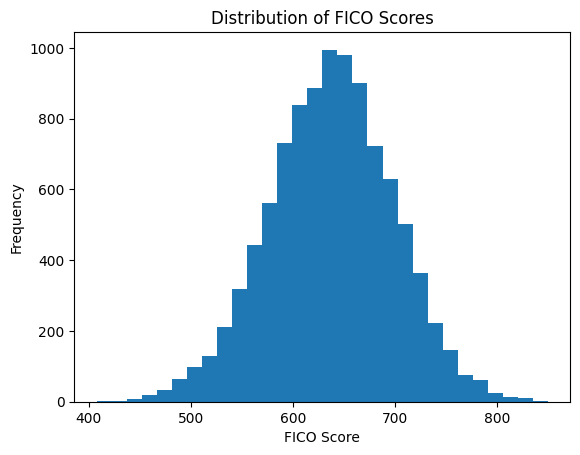

In [ ]:
# Plot histogram of FICO scores to look at overall distribution

import matplotlib.pyplot as plt

plt.hist(df_loan['fico_score'], bins=30) # Optimal bins is the square root of number of values (1000 in this case)
plt.xlabel('FICO Score')
plt.ylabel('Frequency')
plt.title('Distribution of FICO Scores')
plt.show()

In this task, we will focus on minimizing the MSE for each bucket.

In [ ]:
import numpy as np

# Compute the cumulative cost function by implementing the MSE formula:
# cost = (sum of squares) - (sum)^2 / n
def compute_cost(cum_sum, cum_sum_sq, i , j):
  # Number of elements in the interval
  n = j - i + 1
  # Compute totals
  total = cum_sum[j+1] - cum_sum[i]
  total_sq = cum_sum_sq[j+1] - cum_sum_sq[i]
  # Compute cost
  cost = total_sq - ((total**2)/n)

  return cost


In [ ]:
# We use dynamic programming to determine how to create each bucket by minimizing MSE

def optimal_partition(scores, K):
  n = len(scores)

  # Compute cumulative sums and sum of squares arrays to append values to
  cum_sum = np.zeros(n+1)
  cum_sum_sq  = np.zeros(n+1)
  for i in range(1, n+1):
    cum_sum[i] = cum_sum[i-1] + scores[i-1]
    cum_sum_sq[i] = cum_sum_sq[i-1] + scores[i-1]**2

  # dp[i] holds the minimum cost to partition first i scores
  dp = np.full(n+1, np.inf)
  dp[0] = 0

  # Re=store partition points with lowest minimum cost
  partition = np.zeros(n+1, dtype=int)

  # Keeping track of how many buckets we have used
  for i in range(1, n+1):
    for j in range(0,1):
      # Calculate cost
      cost = compute_cost(cum_sum, cum_sum_sq, j, i-1)
      if dp[j] + cost < dp[i]:
        dp[i] = dp[j] + cost
        partition[i] = j

  # Backtrack to get optimal boundaries
  boundaries = []
  i = n
  while i > 0:
    boundaries.append(i)
    i = partition[i]
  boundaries.reverse()

  return boundaries, dp[n]

In [ ]:
# Sort FICO scores
df_fico = df_loan['fico_score']
df_fico = df_fico.sort_values()

In [ ]:
# Example usage

K = 5 # test

boundaries, total_cost = optimal_partition(df_fico, K)
print("Optimal Boundaries (indices):", boundaries)
print("Total MSE Cost:", total_cost)

Optimal Boundaries (indices): [10000]
Total MSE Cost: 36790136.707099915
